In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

# Set the title size globally
plt.rc("axes", titlesize=30)  # Set fontsize of the figure title

In [46]:
df = pd.read_csv("../datasets/abalone/abalone_data.csv", delimiter=",")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       4177 non-null   object 
 1   Length    4177 non-null   float64
 2   Diameter  4177 non-null   float64
 3   Height    4177 non-null   float64
 4   Whole     4177 non-null   float64
 5   Shucked   4177 non-null   float64
 6   Viscera   4177 non-null   float64
 7   Shell     4177 non-null   float64
 8   Rings     4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [38]:
df.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [39]:
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


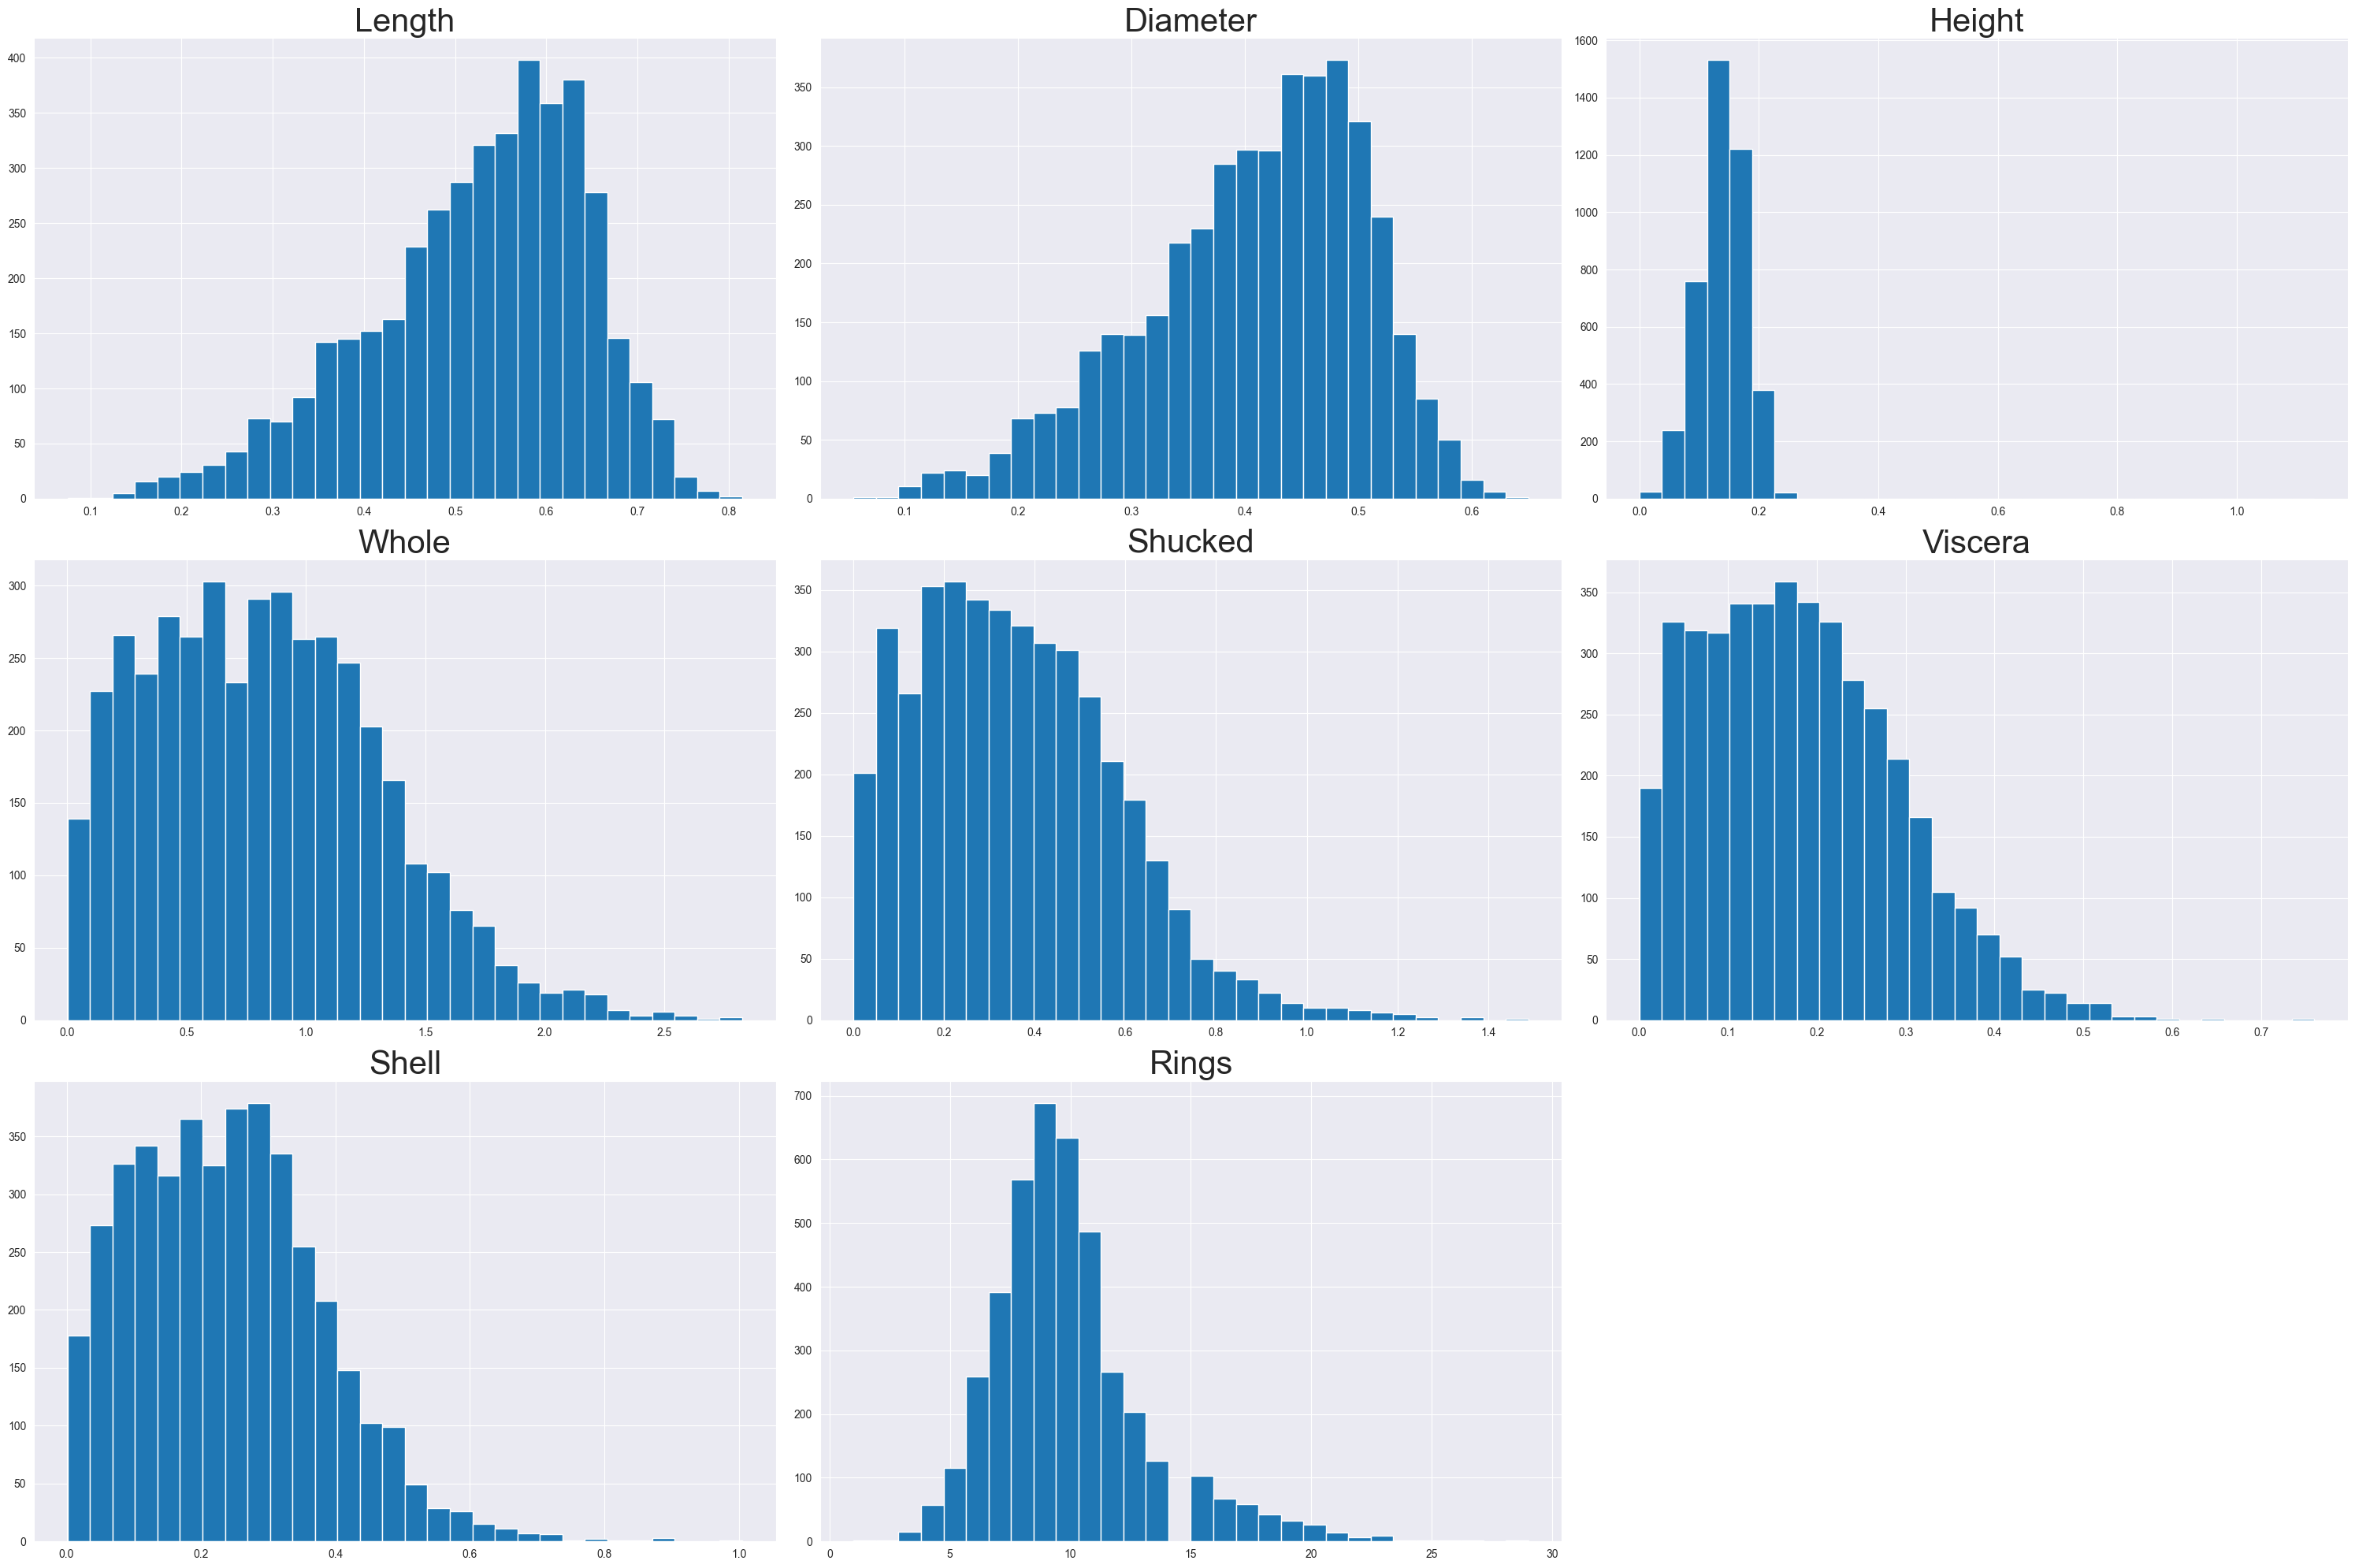

In [40]:
df.hist(bins=30, figsize=(30, 20))
plt.tight_layout()
plt.show()

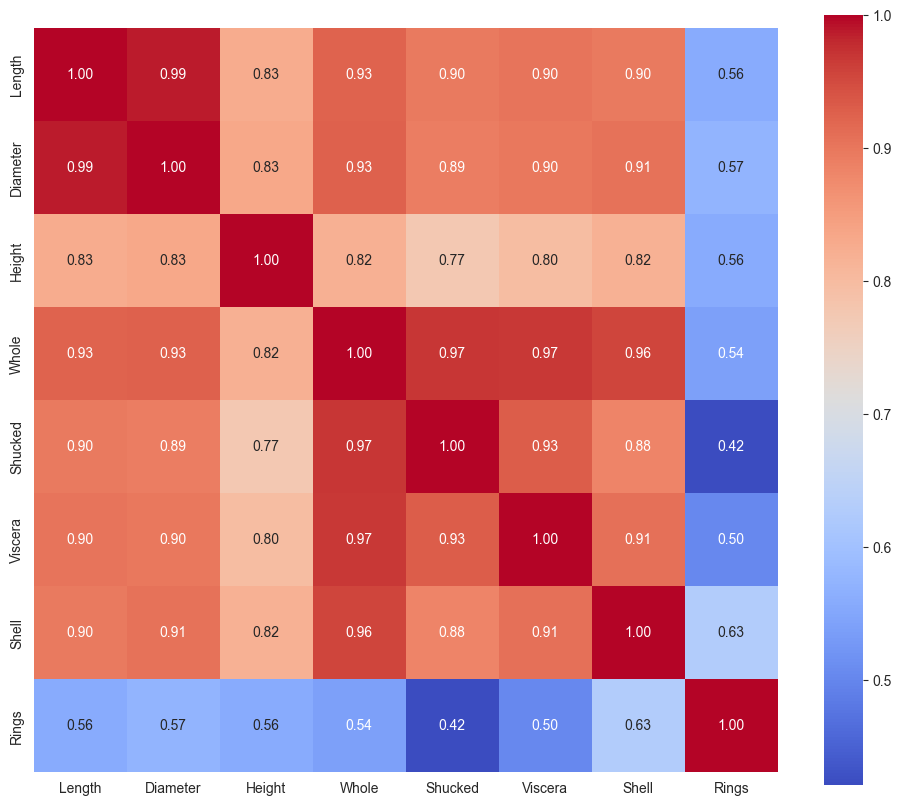

In [41]:
corr = df.corr()

# Draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.show()

We can see a lot of correlations between features. We should reduce the dimensionality of the dataset.

Let's try 2 different approaches to select single features from multiple correlating:
1. ***Statistical Tests***
2. ***Variance Inflation Factor (VIF)***

#### 1. Statistical Tests

In [47]:
from scipy.stats import pearsonr

weight_features = ("Whole", "Shucked", "Viscera", "Shell")
best_weight_feature = max(weight_features, key=lambda feature: pearsonr(df[feature], df["Rings"])[0])
print(f"The best weight feature is {best_weight_feature}")
df = df.drop(columns=(feature for feature in weight_features if feature != best_weight_feature))
df = df.rename(columns={best_weight_feature: "Weight"})

The best weight feature is Shell


In [48]:
size_features = ("Length", "Diameter")
best_size_feature = max(size_features, key=lambda feature: pearsonr(df[feature], df["Rings"])[0])
print(f"The best size feature is {best_size_feature}")
df = df.drop(columns=(feature for feature in size_features if feature != best_size_feature))

The best size feature is Diameter


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       4177 non-null   object 
 1   Diameter  4177 non-null   float64
 2   Height    4177 non-null   float64
 3   Weight    4177 non-null   float64
 4   Rings     4177 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 163.3+ KB


#### 2. Variance Inflation Factor (VIF)